In [1]:
import pandas as pd
import seaborn as sns

The BCHI dataset does not provide the mortality rate for very many years and it does not provide the mortality rate of different age groups. However, this Human Mortality dataset contains data regarding the mortality rate in the U.S.A. for ages 0-110 years old (110 really means older than 110 years old) and for years 1933-2017. The dataset comes from the Human Mortality Database at https://mortality.org/.

In [2]:
df = pd.read_csv('Datasets/USA.Mx_1x1_copy.csv', delim_whitespace=True) \
       .dropna() \
       .drop(columns=['Male', 'Female']) \
       .rename(columns={'Total': 'Mortality_Rate'})

In [3]:
df.sample(5)

,Year,Age,Mortality_Rate
0,1933,0,0.061292
5529,1982,90,0.166737
5989,1986,106,0.445498
3043,1960,46,0.005264
8424,2008,99,0.372601


Now, let's build a regression model that predicts the mortality rate of a specific age group given some year.

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit, train_test_split, cross_val_predict

In [5]:
def evaluate(model, X, y):
    score = round(cross_validate(model, X, y, scoring='r2', cv=ShuffleSplit(n_splits=50, \
                                 test_size=1/3))['test_score'].mean(), 2)
    return score

In [6]:
X = df[['Year', 'Age']]
y = df['Mortality_Rate']
cv = ShuffleSplit(n_splits=50,test_size=1/3)

In [7]:
evaluate(DecisionTreeRegressor(), X, y)

0.98

Decision Tree Regressor has a cross-validation $R^2$ score of $0.98$.

In [8]:
prediction = cross_val_predict(DecisionTreeRegressor(), X, y, cv=20)
df2 = df.copy(deep=True)
df2['Predicted_Mortality_Rate'] = prediction
df2.sample(10)

,Year,Age,Mortality_Rate,Predicted_Mortality_Rate
3135,1961,27,0.001252,0.001296
9213,2016,0,0.005864,0.006161
5942,1986,59,0.011688,0.011111
5962,1986,79,0.061327,0.060975
3211,1961,103,0.378709,0.347550
2082,1951,84,0.144924,0.145907
6509,1991,71,0.029903,0.029059
4561,1974,10,0.000293,0.000325
152,1934,41,0.006584,0.006511
856,1940,79,0.114937,0.110125


Train a model that predicts the mortality rate of a particular age group given a particular year.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print('Score: ', score, sep='')
print('Some Predictions: ', model.predict([
        [1996, 62],
        [1935, 10],
        [1983, 92],
        [1947, 90],
        [2009, 95]]), sep='')

Score: 0.9847428172121558
Some Predictions: [0.0140035  0.00141279 0.202741   0.243893   0.2709445 ]


In [10]:
def plot_mortality(age, year):
    years = [year for year in range(1933, year)]
    predictions = model.predict([[year, age] for year in years])
    df3 = pd.DataFrame(data={'Year': years, 'Predicted_Mortality_Rate': predictions})
    sns.relplot(x='Year', y='Predicted_Mortality_Rate', data=df3)

Predicted Mortality Rate for 80 Year Olds:


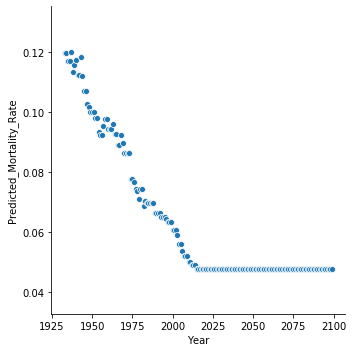

In [11]:
print('Predicted Mortality Rate for 80 Year Olds:')
plot_mortality(80, 2100)

Predicted Mortality Rate for 90 Year Olds:


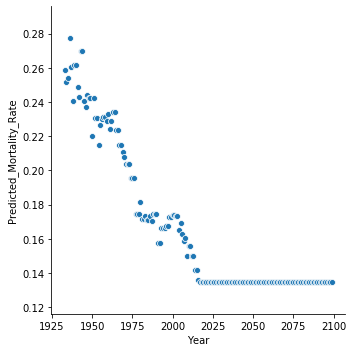

In [12]:
print('Predicted Mortality Rate for 90 Year Olds:')
plot_mortality(90, 2100)